In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm 

In [60]:
#import data for general plot
runs1 = pd.read_csv("data/run1_v2.csv", sep = ";")
runs2 = ["data/run2.csv"]
runs3 = pd.read_csv("data/run3.csv", sep = ";")
runs4 = pd.read_csv("data/run4.csv", sep = ";")

for run in runs1:
    voltage1 = runs1["Voltage (V) Run #16"].to_numpy()
    current_n1 = runs1["Current (A) Run #16"].to_numpy()
current1 = (-1)*current_n1

for run in runs2:
    voltage2 = pd.read_csv(run)["Voltage (V)"].to_numpy()
    current_n2 = pd.read_csv(run)["Current (A)"].to_numpy()
current2 = (-1)*current_n2

for run in runs3:
    voltage3 = runs3["Voltage (V)"].to_numpy()
    current_n3 = runs3["Current (A)"].to_numpy()
current3 = (-1)*current_n3

for run in runs4:
    voltage4 = runs4["Voltage (V)"].to_numpy()
    current_n4 = runs4["Current (A)"].to_numpy()
current4 = (-1)*current_n4

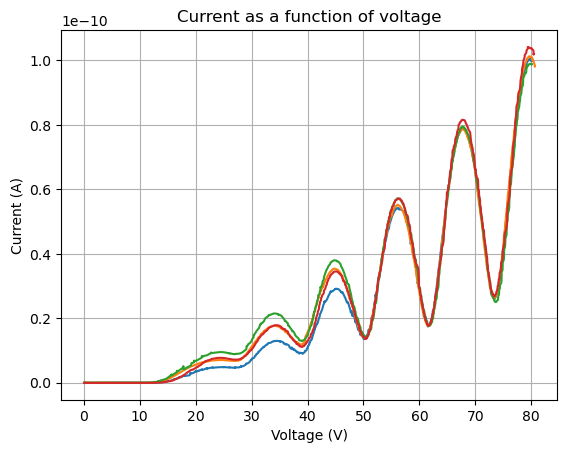

In [61]:
#plot current against voltage

plt.figure()
plt.plot(voltage1, current1)
plt.plot(voltage2, current2)
plt.plot(voltage3, current3)
plt.plot(voltage4, current4)
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.title("Current as a function of voltage")
plt.grid()
plt.show()           

In [69]:
#extracting 5 minimas

windows = [25, 33, 45, 57, 68, 79]

voltage_min_all, current_min_all = [], []

#creates array of voltage with inside array of each 5 minimas for 1 data set, and array with same for current - 
#not very optimal coding but it works ! - we dont care about the current tho do we ?

voltage_min, current_min = [], []
for i in range(5):
    mask = (voltage1 >= windows[i]) & (voltage1 < windows[i+1])
    idx = np.argmin(current1[mask])
    voltage_min.append(voltage1[mask][idx])
    current_min.append(current1[mask][idx])
voltage_min_all.append(voltage_min)
current_min_all.append(current_min)

voltage_min, current_min = [], []
for i in range(5):
    mask = (voltage2 >= windows[i]) & (voltage2 < windows[i+1])
    idx = np.argmin(current2[mask])
    voltage_min.append(voltage2[mask][idx])
    current_min.append(current2[mask][idx])
voltage_min_all.append(voltage_min)
current_min_all.append(current_min)

voltage_min, current_min = [], []
for i in range(5):
    mask = (voltage3 >= windows[i]) & (voltage3 < windows[i+1])
    idx = np.argmin(current3[mask])
    voltage_min.append(voltage3[mask][idx])
    current_min.append(current3[mask][idx])
voltage_min_all.append(voltage_min)
current_min_all.append(current_min)

voltage_min, current_min = [], []
for i in range(5):
    mask = (voltage4 >= windows[i]) & (voltage4 < windows[i+1])
    idx = np.argmin(current4[mask])
    voltage_min.append(voltage4[mask][idx])
    current_min.append(current4[mask][idx])
voltage_min_all.append(voltage_min)
current_min_all.append(current_min)

print(voltage_min_all)

[[np.float64(27.017), np.float64(39.141), np.float64(50.16), np.float64(61.513), np.float64(73.385)], [np.float64(26.982), np.float64(38.798), np.float64(50.244), np.float64(61.573), np.float64(73.376)], [np.float64(27.001), np.float64(38.977), np.float64(50.49), np.float64(61.772), np.float64(73.672)], [np.float64(27.238), np.float64(39.017), np.float64(50.392), np.float64(61.635), np.float64(73.348)]]


In [75]:
#creates mean of each minima

min_by_min_voltage = np.column_stack(voltage_min_all)

#voltage 
mean_mins_volatge = np.mean(min_by_min_voltage, axis = 1)
std_mins_voltage = np.std(min_by_min_voltage, axis = 1)
sem_mins_voltage = std_mins_voltage/np.sqrt(4)

print(mean_mins_volatge)
print(std_mins_voltage)
print(sem_mins_voltage) 

[27.0595  38.98325 50.3215  61.62325 73.44525]
[0.10379908 0.12286247 0.12791697 0.09610509 0.13162328]
[0.05189954 0.06143124 0.06395848 0.04805254 0.06581164]


In [79]:
#interval between minimas
period = [mean_mins_volatge[1]-mean_mins_volatge[0], mean_mins_volatge[2]-mean_mins_volatge[1], 
                  mean_mins_volatge[3]-mean_mins_volatge[2], mean_mins_volatge[4]-mean_mins_volatge[3]]

mean_period = np.mean(period)

print(mean_period)

11.5964375
